In [1]:
!pip install sidetable

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import sidetable as stb

In [3]:
import missingno as msno
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform

In [4]:
df = pd.read_csv("/content/drive/MyDrive/EstudosColab/data.csv",  encoding='cp1252')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


###Análise de dados

In [5]:
df.shape # tamanho do DF

(541909, 8)

In [6]:
df.info()
# encontrado faltantes Description e CustomerID

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


#### Avaliar dados e nulos



In [8]:
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
df['StockCode'] = df['StockCode'].astype(str)
df['Description'] = df['Description'].astype(str)
df['Country'] = df['Country'].astype(str)


In [9]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) # aqui transformamos InvoiceData de Object para Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541909 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [10]:
#type(df.isna().sum())
df.isna().sum() #nulos por linha -

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
df.stb.missing()

,missing,total,percent
CustomerID,135080,541909,24.926694
InvoiceNo,0,541909,0.000000
StockCode,0,541909,0.000000
Description,0,541909,0.000000
Quantity,0,541909,0.000000
InvoiceDate,0,541909,0.000000
UnitPrice,0,541909,0.000000
Country,0,541909,0.000000


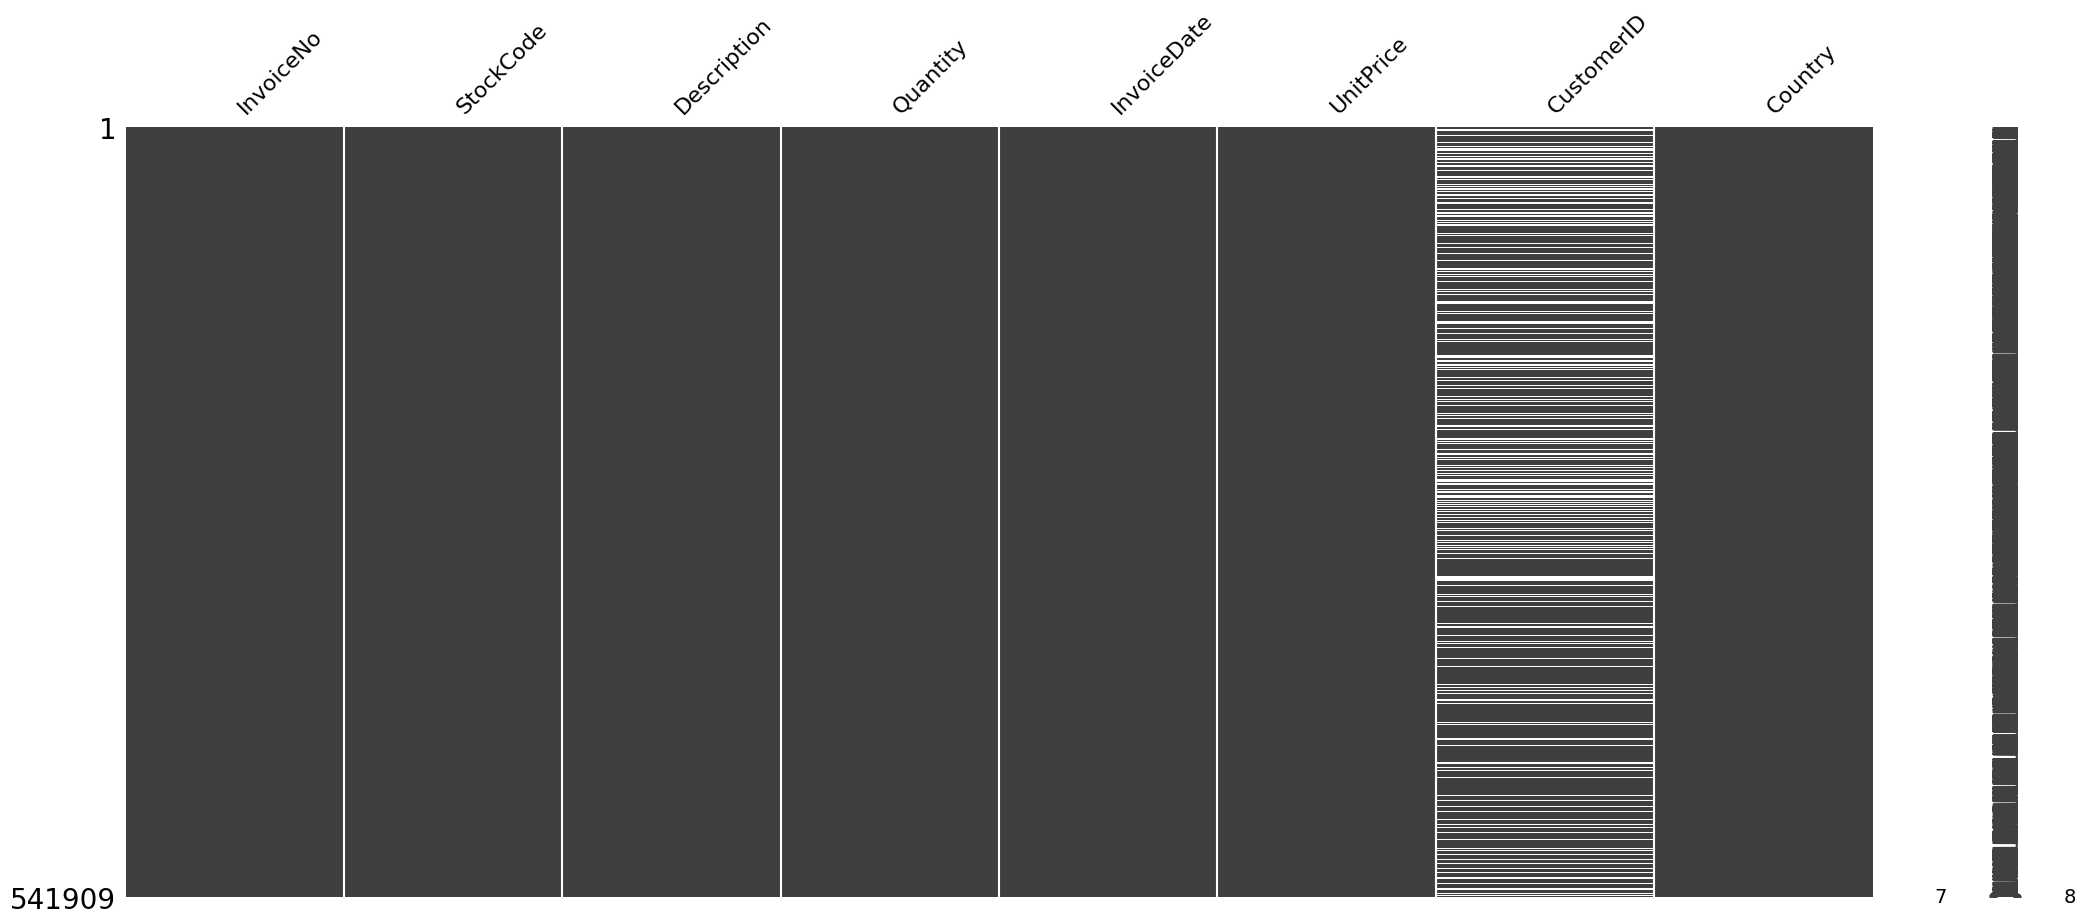

In [12]:
msno.matrix(df);# onde esta o velor faltante numa matrix?
#ve um posicionamento do que esta faltando

> sem conseguir identificar o Cliente não vale apena ter a informação?



>Poderia ser uma pergunta para o Depart responsável antes de apagar; mas vamos considerar que se não tiver CustomerID não serve




In [13]:
df = df.dropna(subset=['CustomerID'])
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Com isso o df esta limpo de Nulos


In [14]:
df.shape

(406829, 8)

In [15]:
# Verificar se há números negativos na coluna "Quantity"
if (df['Quantity'] < 0).any():
    print("Sim, existem números negativos na coluna 'Quantity'.")
else:
    print("Não, não existem números negativos na coluna 'Quantity'.")


Sim, existem números negativos na coluna 'Quantity'.


### Problema de Quantidades e Preços negativos
#### supondo que não se pode ter quantidades negativos serão eliminados

In [16]:
# Selecione as linhas onde 'Quantity' é menor que zero
print(df[df['Quantity'] < 0])

       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00      27.50     1

In [17]:
# Selecione as linhas onde 'Quantity' é menor que zero
print("Total de linhas com valores negativos na coluna 'Quantity':", len(df[df['Quantity'] < 0]))

Total de linhas com valores negativos na coluna 'Quantity': 8905


In [18]:
# Eliminar linhas que tenham quantidade negativas
df = df[df['Quantity'] >= 0]

In [19]:
print(df[df['Quantity'] < 0])

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


In [20]:
# Selecione as linhas onde 'Quantity' é menor que zero
print(df[df['UnitPrice'] < 0])

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


### Analisar Outlaiers

In [21]:
df.columns


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

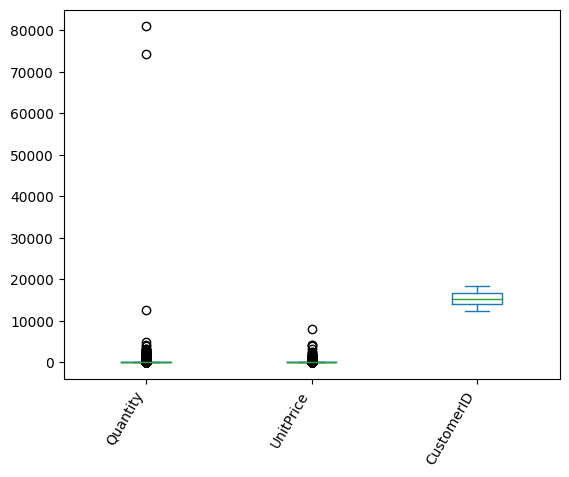

In [22]:
# Boxplot - mostra outlairs

df.plot.box()
plt.xticks(rotation=60, ha='right');

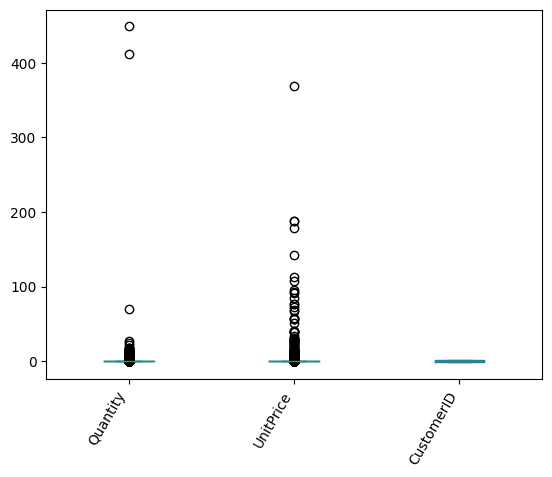

In [23]:
# Selecionar apenas colunas numéricas, excluindo 'CustomerID'
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Aplicar escala às colunas numéricas
scaled_data = scale(df_numeric)

# Criar um novo DataFrame com os dados escalados
df_scaled = pd.DataFrame(scaled_data, columns=df_numeric.columns)

# Plotar o boxplot do DataFrame escalado
df_scaled.plot.box()
plt.xticks(rotation=60, ha='right')
plt.show()


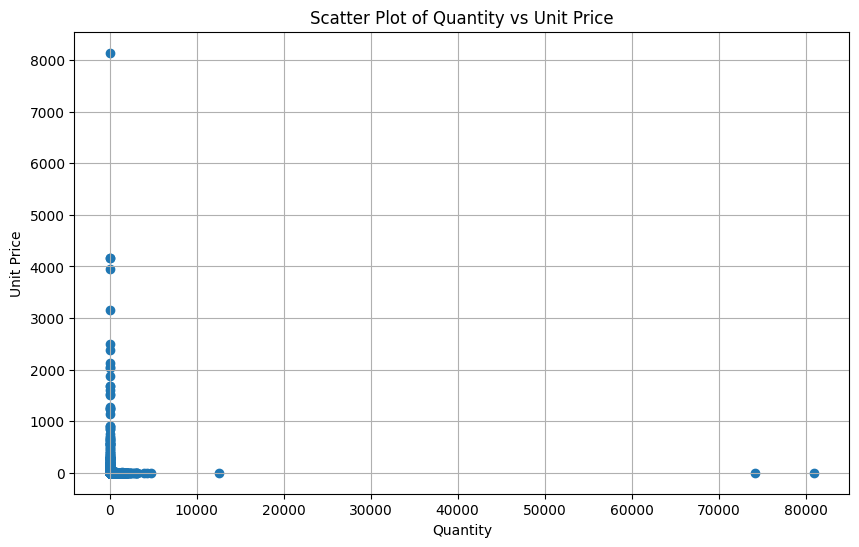

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Quantity'], df['UnitPrice'])
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.title('Scatter Plot of Quantity vs Unit Price')
plt.grid(True)
plt.show()


In [25]:
# Remover outliers extremos
df = df[(df['Quantity'] <= 10000) & (df['UnitPrice'] <= 5000)]

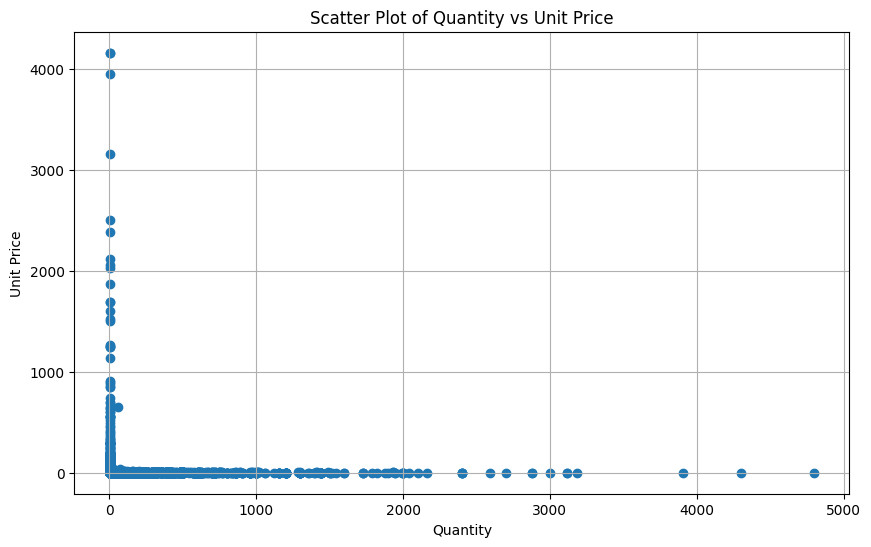

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Quantity'], df['UnitPrice'])
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.title('Scatter Plot of Quantity vs Unit Price')
plt.grid(True)
plt.show()

In [29]:
df.columns


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'purchase'],
      dtype='object')

In [27]:
# Criar a coluna 'TotalPrice' com o preço total da compra
df['purchase'] = df['Quantity'] * df['UnitPrice']


<ipython-input-27-c598279dd3c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['purchase'] = df['Quantity'] * df['UnitPrice']


In [30]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,purchase
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [31]:
ultima_compra = df['InvoiceDate'].max()

print("Data da última compra:", ultima_compra)

Data da última compra: 2011-12-09 12:50:00


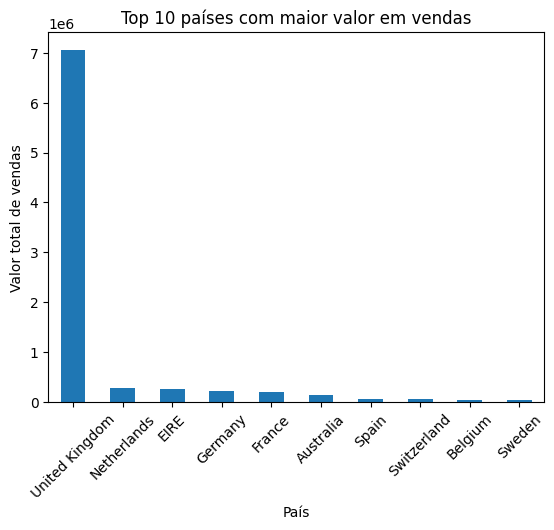

In [33]:
# Top 10 países com maior valor em vendas
top_paises = df.groupby('Country')['purchase'].sum().nlargest(10)
top_paises.plot(kind='bar', xlabel='País', ylabel='Valor total de vendas', title='Top 10 países com maior valor em vendas')
plt.xticks(rotation=45)
plt.show()

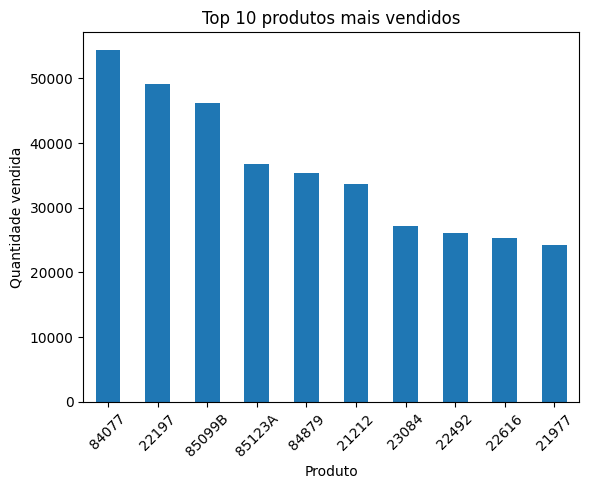

In [34]:
# Top 10 produtos mais vendidos
top_produtos = df.groupby('StockCode')['Quantity'].sum().nlargest(10)
top_produtos.plot(kind='bar', xlabel='Produto', ylabel='Quantidade vendida', title='Top 10 produtos mais vendidos')
plt.xticks(rotation=45)
plt.show()

<ipython-input-36-df151d976b27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')


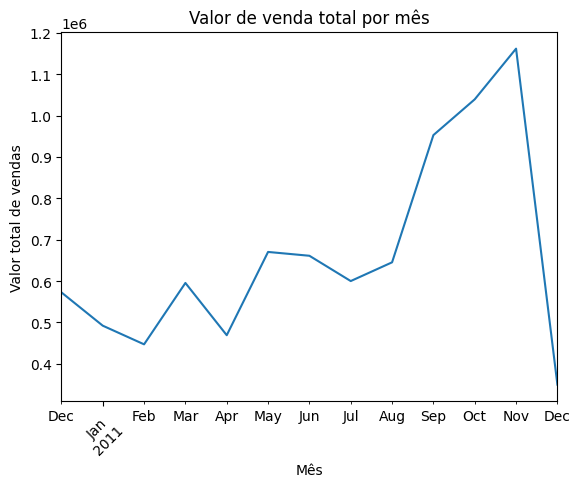

In [36]:
# Valor de venda total por mês
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
vendas_por_mes = df.groupby('InvoiceMonth')['purchase'].sum()
vendas_por_mes.plot(kind='line', xlabel='Mês', ylabel='Valor total de vendas', title='Valor de venda total por mês')
plt.xticks(rotation=45)
plt.show()

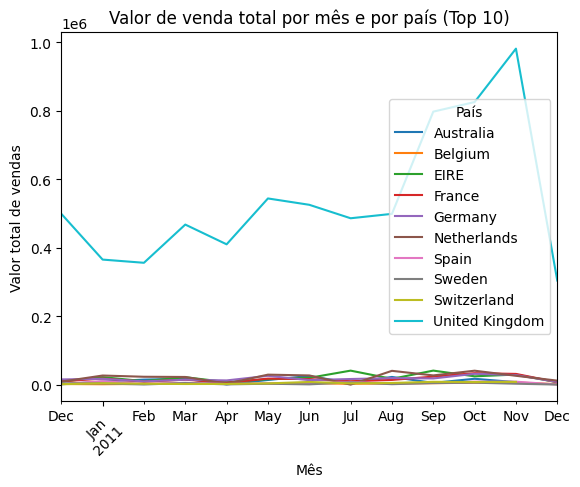

In [37]:
# Valor de venda total por mês e por país (considerando apenas os top 10)
top_paises = df.groupby('Country')['purchase'].sum().nlargest(10).index
df_top_paises = df[df['Country'].isin(top_paises)]
vendas_por_mes_pais = df_top_paises.groupby(['InvoiceMonth', 'Country'])['purchase'].sum().unstack()
vendas_por_mes_pais.plot(kind='line', xlabel='Mês', ylabel='Valor total de vendas', title='Valor de venda total por mês e por país (Top 10)')
plt.xticks(rotation=45)
plt.legend(title='País')
plt.show()

In [50]:
import pandas as pd

# Agrupar os dados por cliente e pedido/compra (InvoiceNo) e obter a data e o preço total do pedido
dados_cliente = df.groupby(['CustomerID', 'InvoiceNo']).agg({'InvoiceDate': 'max', 'purchase': 'sum'})

# Calcular a recência (R)
data_ultima_compra = df['InvoiceDate'].max()
dados_cliente['Recency'] = (data_ultima_compra - dados_cliente['InvoiceDate']).dt.days

# Calcular a frequência (F)
dados_cliente['Frequency'] = df.groupby('CustomerID')['InvoiceNo'].nunique()
# Preencher NaN com 0
dados_cliente['Frequency'].fillna(0, inplace=True)

# Calcular o valor monetário (M)
dados_cliente['Monetary'] = df.groupby('CustomerID')['purchase'].mean()

# Renomear as colunas para RFM
dados_cliente.rename(columns={'InvoiceDate': 'LastPurchaseDate'}, inplace=True)

# Visualizar os dados do cliente com RFM
print(dados_cliente.head())


                        LastPurchaseDate  purchase  Recency  Frequency  \
CustomerID InvoiceNo                                                     
12347.0    537626    2010-12-07 14:57:00    711.79      366        0.0   
           542237    2011-01-26 14:30:00    475.39      316        0.0   
           549222    2011-04-07 10:43:00    636.25      246        0.0   
           556201    2011-06-09 13:01:00    382.52      182        0.0   
           562032    2011-08-02 08:48:00    584.91      129        0.0   

                      Monetary  
CustomerID InvoiceNo            
12347.0    537626          NaN  
           542237          NaN  
           549222          NaN  
           556201          NaN  
           562032          NaN  
